In [1]:
import pickle
import numpy as np

from platython import util as pu
from platython import plotting as pl
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from samap.analysis import *

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

pu.timestamp()

## 2023-06-21, 15:34 


# SAMap overview

Here I will have a first look at the similarities between _A. fascicularis_ and _C. gigas_. I will
not go into details but rather go for the bird's eye view, and look for broad patterns.

Define our base directory:

In [2]:
base = "./"

Read the SAMap output file:

In [3]:
file = open("./pcro_cgig.pkl", "rb")
sm = pickle.load(file)

Some light QC before comparison, mostly removing really small clusters.

In [4]:
query_species = "pcro"
target_species = "cgig"
query_clustering = "fine"
query_coarse = "coarse"
target_clustering = "fine"
target_coarse = "coarse"

##### remove very small clusters
freq = sm.sams[target_species].adata.obs[target_clustering].value_counts()
remove = freq[freq<10].index
cells_to_keep_sm = ~sm.sams[target_species].adata.obs[target_clustering].isin(remove)
sm.sams[target_species].adata = sm.sams[target_species].adata[cells_to_keep_sm].copy()

##### same for query species
freq = sm.sams[query_species].adata.obs[query_clustering].value_counts()
remove = freq[freq<10].index
cells_to_keep_af = ~sm.sams[query_species].adata.obs[query_clustering].isin(remove)
sm.sams[query_species].adata = sm.sams[query_species].adata[cells_to_keep_af].copy()
sm.sams[query_species].adata.obs[query_coarse] = sm.sams[query_species].adata.obs[query_clustering].str.split("-").str[0]

##### remove from the central adata as well:
cells_to_keep = np.concatenate((cells_to_keep_af, cells_to_keep_sm))
sm.samap.adata = sm.samap.adata[cells_to_keep].copy()

#### go on with mapping
keys = {query_species: query_clustering, target_species: target_clustering}
D, MappingTable = get_mapping_scores(sm, keys, n_top=200)

Parsing the mapping table. This is a SAMap output that holds the similarity score between all
cluster pairs. It is usually visualised as a Sankey plot, but it is really hard to see patterns in a
Sankey plot, so we will make an annotated heatmap instead.

In [5]:
target_clusters = MappingTable.index[MappingTable.index.str.startswith(target_species)]
query_clusters = MappingTable.index[MappingTable.index.str.startswith(query_species)]

In [6]:
to_plot = MappingTable.loc[target_clusters][query_clusters]

Plot the coarse cell types. Ideally these are cell type families determined by a cell type tree.

/Users/npapadop/mambaforge/envs/samap_minimal/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


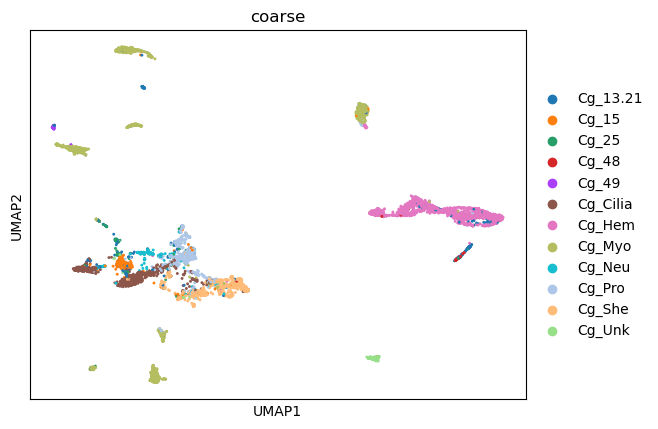

In [7]:
target_map, target_lut, target_handles = pl.map_fine_to_coarse(sm,
                                                               target_species,
                                                               target_clustering,
                                                               target_coarse,
                                                               plot=sc.pl.umap)

/Users/npapadop/mambaforge/envs/samap_minimal/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


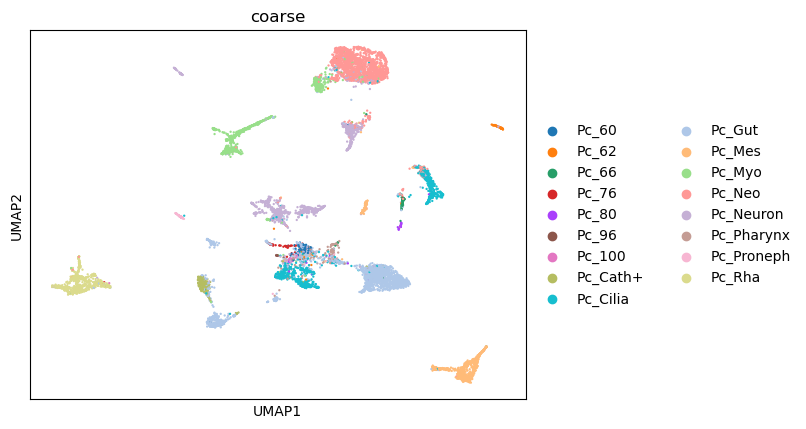

In [9]:
query_map, query_lut, query_handles = pl.map_fine_to_coarse(sm,
                                                            query_species,
                                                            query_clustering,
                                                            query_coarse)

Perform differential gene expression analysis, since we are going to need it downstream

In [ ]:
sc.tl.rank_genes_groups(sm.sams[query_species].adata, groupby=query_clustering)

In [ ]:
sc.tl.rank_genes_groups(sm.sams[target_species].adata, groupby=target_clustering)

Update the pickled object so the DE analysis is included:

In [ ]:
with open(base + "results/afas_cgig.pkl", "wb") as f:
    pickle.dump(sm, f)

Make the annotated heatmap, showing chiton clusters in the order of the cell type tree, and color
rows and columns by the cell type family.

In [ ]:
chiton_order = ["afas_sensory_9_motor_neuron", "afas_sensory_10_motor_neuron", "afas_sensory_6_motor_neuron", "afas_sensory_7_lateral_episphere", "afas_sensory_8_motor_neuron", "afas_sensory_5_photoreceptors_episphere", "afas_sensory_4_motor_neuron", "afas_sensory_3_postrochal_photoreceptors", "afas_sensory_1_episphere", "afas_sensory_12_aesthetes", "afas_sensory_13_lateral_episphere", "afas_sensory_15_lateral_episphere", "afas_sensory_14", "afas_sensory_16_lateral_episphere", "afas_sensory_17", "afas_sensory_11_Posterior_most", "afas_sensory_2", "afas_endoderm_3_1", "afas_endoderm_3_2", "afas_endoderm_15_pedal_gland", "afas_unk2_29", "afas_unk1_24", "afas_unk1_26_1", "afas_unk1_26_2", "afas_muscle_2_1", "afas_muscle_2_3", "afas_muscle_2_4", "afas_muscle_2_2", "afas_secretory_23_1_pedal_gland", "afas_secretory_23_2_foot_sole", "afas_secretory_27", "afas_secretory_unass_9", "afas_neurons_1_sensory_neurons_episphere", "afas_neurons_3_sensory_neurons_episphere", "afas_neurons_6_sensory_neurons_posterior_most", "afas_neurons_2_sensory_neurons_episphere", "afas_neurons_4_sensory_neurons_episphere", "afas_neurons_5_sensory_neurons_episphere", "afas_neurons_7_sensory_neurons_apical_organ", "afas_gut_13_mobile_ciliated_foot_sole", "afas_gut_21_mobile_ciliated_stomodeum", "afas_gut_18_1_mobile_ciliated_foregut", "afas_ciliated_9_1", "afas_ciliated_9_2", "afas_ciliated_20", "afas_ciliated_unass_6", "afas_ciliated_old_trans_2_apical_organ", "afas_ciliated_unass_7", "afas_spicule_6_1", "afas_spicule_6_2", "afas_spicule_6_4", "afas_spicule_6_3", "afas_spicule_30_shell_field_spicules", "afas_shell_5", "afas_shell_19", "afas_shell_14_1", "afas_neurons_8_sensory_neurons", "afas_neurons_9_sensory_neurons", "afas_neurons_11_sensory_neurons_postrochal_PR", "afas_neurons_10_sensory_neurons", "afas_protonephridia_18_2_not_ciliated", "afas_protonephridia_18_3_not_ciliated"]

In [ ]:
to_plot = to_plot[chiton_order[::-1]]

First we'll make an interactive HTML plot, since the heatmap can become pretty unwieldy.

We'll also make a traditional version:

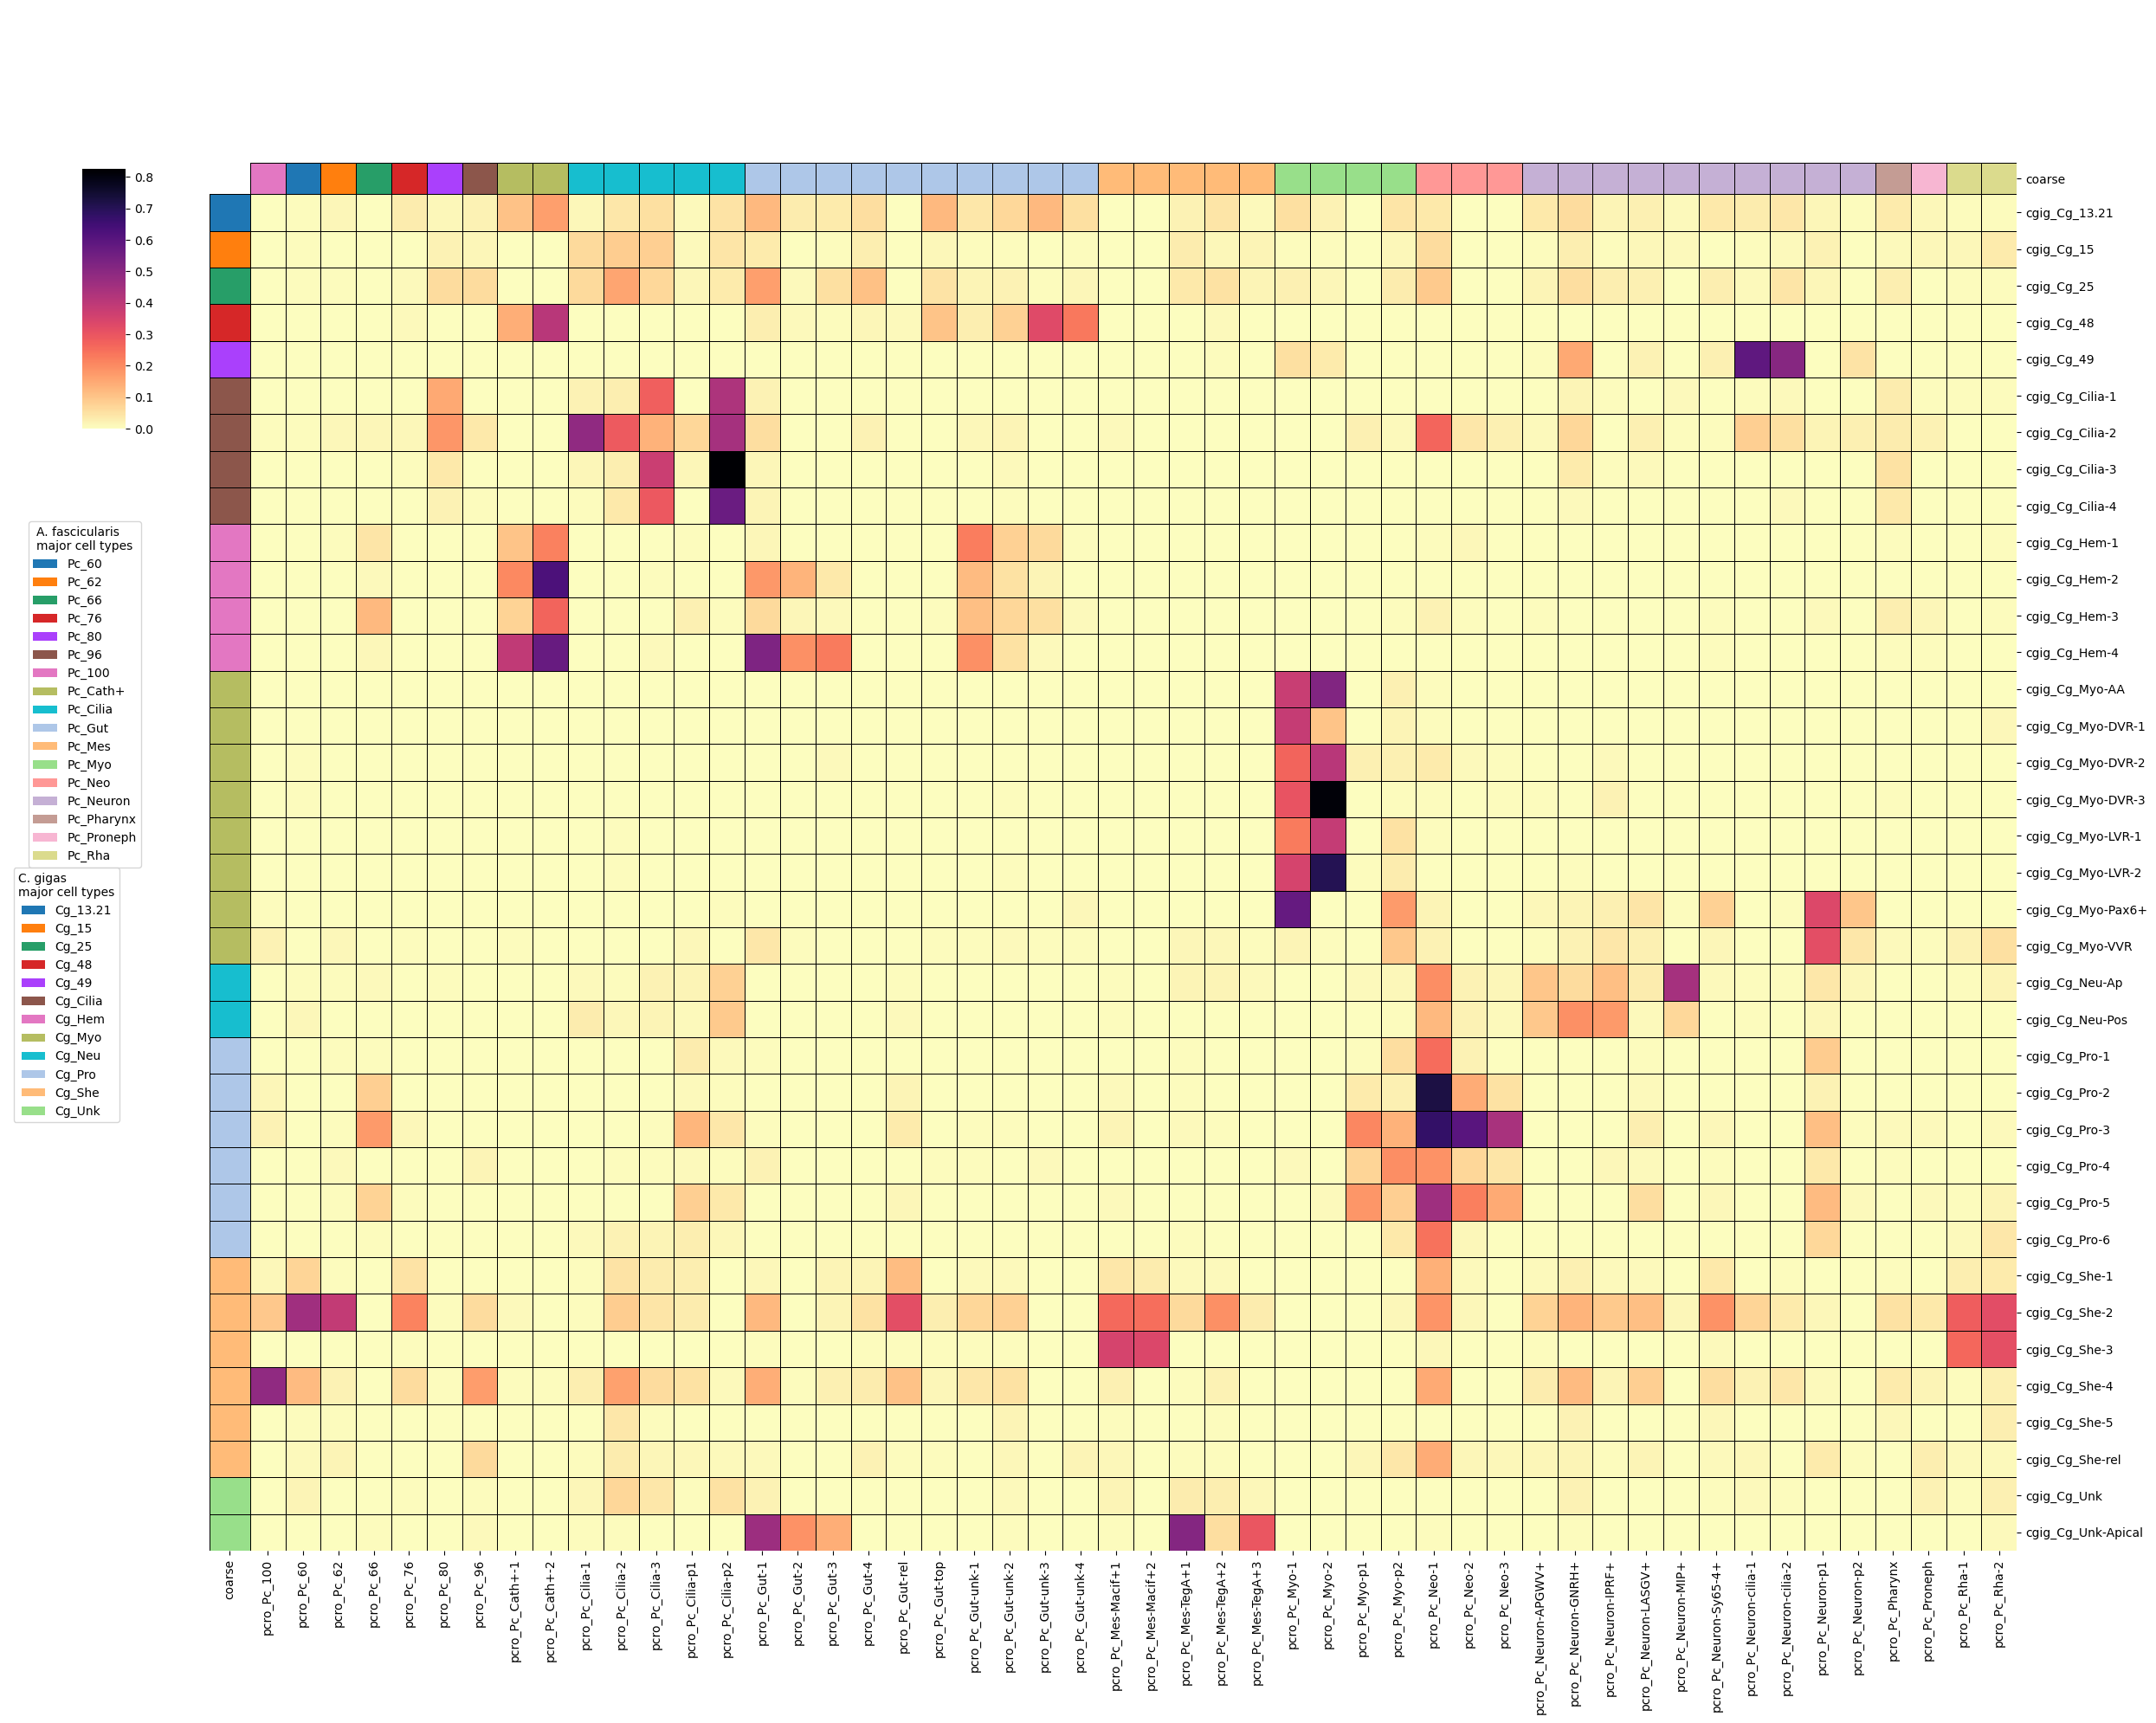

In [17]:
query_map[query_coarse] = query_map[query_coarse].replace(to_replace=query_lut)
target_map[target_coarse] = target_map[target_coarse].replace(to_replace=target_lut)

sns.clustermap(to_plot, cmap="magma_r", figsize=(25, 20), col_cluster=None, row_cluster=None,
               dendrogram_ratio=0.1, colors_ratio=0.02, cbar_pos=(0.04, 0.75, 0.02, 0.15),
               row_colors=target_map.set_index(target_clustering)[target_coarse],
               col_colors=query_map.set_index(query_clustering)[query_coarse],
               linecolor="black", linewidths=0.5)

query_legend = plt.legend(query_handles, query_lut, title=f"A. fascicularis\nmajor cell types",
           bbox_to_anchor=(0.07, 0.7), bbox_transform=plt.gcf().transFigure, loc="upper right")
plt.gca().add_artist(query_legend)

plt.legend(target_handles, target_lut, title=f"C. gigas\nmajor cell types",
           bbox_to_anchor=(0.06, 0.5), bbox_transform=plt.gcf().transFigure, loc="upper right");

SAMap's overlapping UMAP:

In [ ]:
sm.scatter()

### Gene pairs calculation

We will now perform cross-species pairwise comparisons of all clusters and find the genes that drive
their similarity.

In [ ]:
#### go on with mapping
keys = {query_species: query_clustering,
        target_species: target_clustering}

In [ ]:
gpf = GenePairFinder(sm, keys=keys)

In [ ]:
gene_pairs = gpf.find_all(align_thr=0.1)

In [ ]:
gene_pairs.to_csv(base + "results/cgig/gene_pairs.tsv", sep="\t", index=False)

In [ ]:
pu.timestamp()